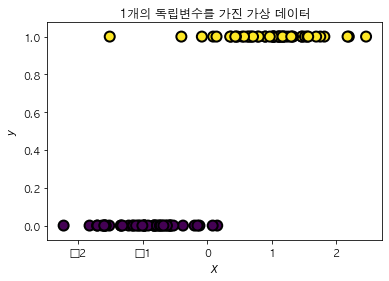

In [1]:
# 분류용 가상 데이터 생성
# https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

plt.title("1개의 독립변수를 가진 가상 데이터")
X, y = make_classification(
    n_features=1,           # 독립변수의 수
    n_informative=1,        # 종속변수와 상관관계가 있는 성분의 수
    n_redundant=0,          # 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
    n_clusters_per_class=1, # 클래스 당 클러스터의 수
    random_state=4, 
    #n_samples=100,         # 표본 데이터의 수
    #n_repeated=0,          # 단순 중복된 성분의 독립변수의 수
    #n_classes=2            # 종속변수의 클래수 수
    #weights                #각 클래스에 할당된 표본 수
)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

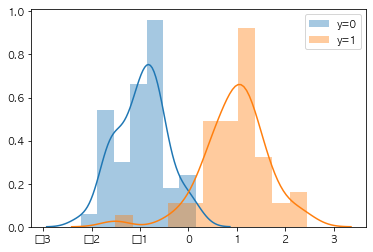

In [2]:
sns.distplot(X[y==0], label="y=0")
sns.distplot(X[y==1], label="y=1")
plt.legend()
plt.show()

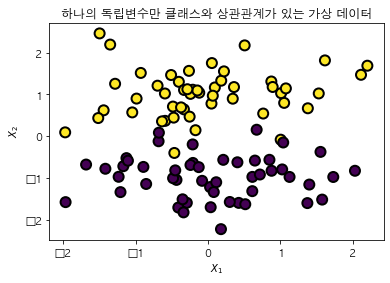

In [3]:
plt.title("하나의 독립변수만 클래스와 상관관계가 있는 가상 데이터")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

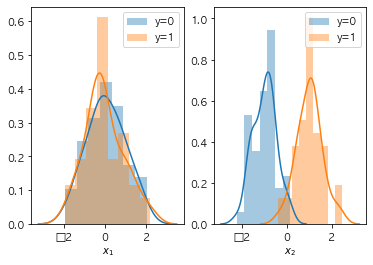

In [4]:
plt.subplot(121)
sns.distplot(X[y==0,0], label="y=0")
sns.distplot(X[y==1,0], label="y=1")
plt.legend()
plt.xlabel("$x_1$")
plt.subplot(122)
sns.distplot(X[y==0,1], label="y=0")
sns.distplot(X[y==1,1], label="y=1")
plt.legend()
plt.xlabel("$x_2$")
plt.show()

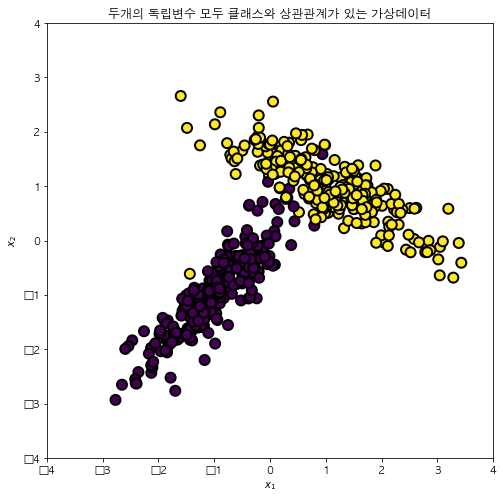

In [5]:
plt.figure(figsize=(8,8))
plt.title("두개의 독립변수 모두 클래스와 상관관계가 있는 가상데이터")
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

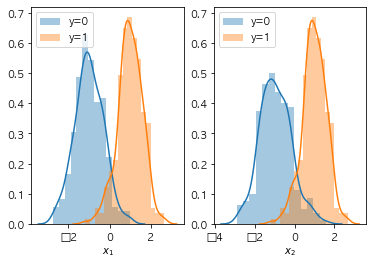

In [6]:
plt.subplot(121)
sns.distplot(X[y==0, 0], label="y=0")
sns.distplot(X[y==1, 1], label="y=1")
plt.legend()
plt.xlabel("$x_1$")
plt.subplot(122)
sns.distplot(X[y==0, 1], label="y=0")
sns.distplot(X[y==1, 1], label="y=1")
plt.legend()
plt.xlabel("$x_2$")
plt.show()

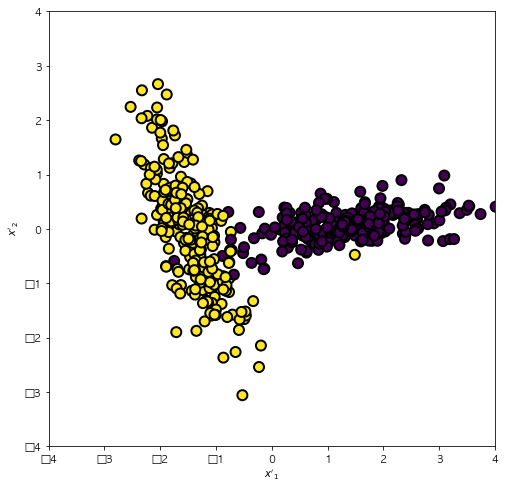

In [7]:
l, V = np.linalg.eig(X.T @ X)
X2 = -X @ V
plt.figure(figsize=(8,8))
plt.scatter(X2[:,0], X2[:,1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("$x'_1$")
plt.ylabel("$x'_2$")
plt.show()

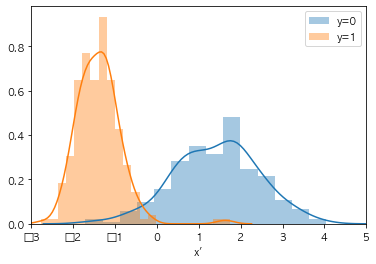

In [8]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
sns.distplot(X_pca[y==0], label="y=0")
sns.distplot(X_pca[y==1], label="y=1")
plt.legend()
plt.xlabel("x'")
plt.xlim(-3,5)
plt.show()


각 클래스별 데이터의 갯수 - 0클래스: 90 / 1클래스: 10


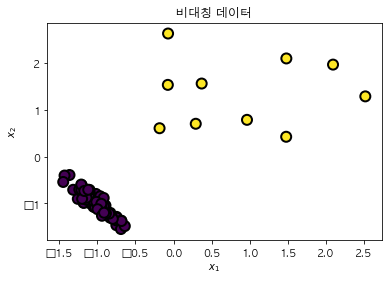

In [9]:
# 클래스별 데이터 갯수를 달리 줄때: weights 
plt.title("비대칭 데이터")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9,0.1], random_state=6)
val, cnt = np.unique(y, return_counts=True)
print("각 클래스별 데이터의 갯수 - {}클래스: {} / {}클래스: {}".format(val[0],cnt[0],val[1],cnt[1]))
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

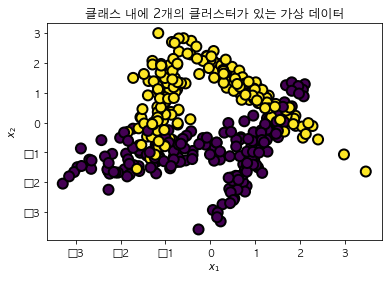

In [10]:
# 클래스 당 여러개의 클래스: n_clusters_per_class
# (n_classes) x (n_clusters_per_class) <= 2^(n_informative)
plt.title("클래스 내에 2개의 클러스터가 있는 가상 데이터")
X2, Y2 = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, 
                             n_clusters_per_class=2, random_state=0)
plt.scatter(X2[:,0], X2[:,1], marker='o', c=Y2, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

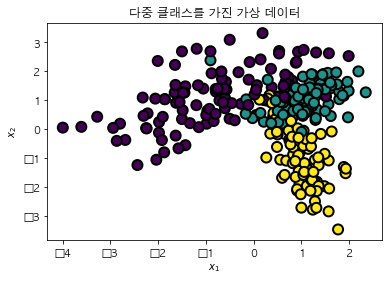

In [11]:
# 다중 클래스: n_classes
plt.title("다중 클래스를 가진 가상 데이터")
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3, random_state=0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

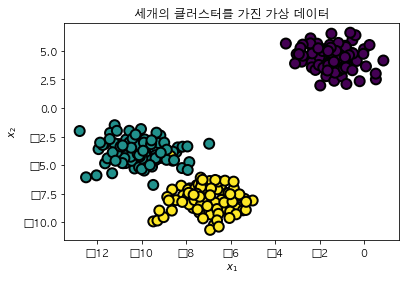

In [12]:
# 등방성 가우시안 분포: make_blobs
from sklearn.datasets import make_blobs
plt.title("세개의 클러스터를 가진 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1,)
                  #cluster_std=1.0, center_box=(-10.,10.))
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

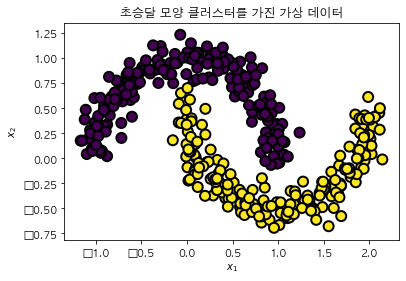

In [13]:
# 초승달 모양 클러스터: make_moons
from sklearn.datasets import make_moons
plt.title("초승달 모양 클러스터를 가진 가상 데이터")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

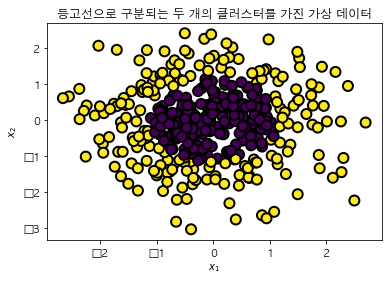

In [14]:
# 다차원 가우시안 분포: make_gaussian_quantiles
from sklearn.datasets import make_gaussian_quantiles
plt.title("등고선으로 구분되는 두 개의 클러스터를 가진 가상 데이터")
X, y = make_gaussian_quantiles(n_samples=400, n_features=2, n_classes=2, random_state=0)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()